# Problem 1
Ambica Govind,EP21BTECH11007

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.resample import bootstrap
from scipy.stats import norm
from astroML.stats import median_sigmaG
import scipy.stats as stats

In [18]:
data = norm(0, 1).rvs(1000)
mu1,sigma_mu1= bootstrap(data, 10000,  median_sigmaG,kwargs= dict(axis=1))
x = np.linspace(-1,1, 1000)
gauss=stats.norm.pdf(x,np.mean(mu1),np.sqrt(np.pi/2000))

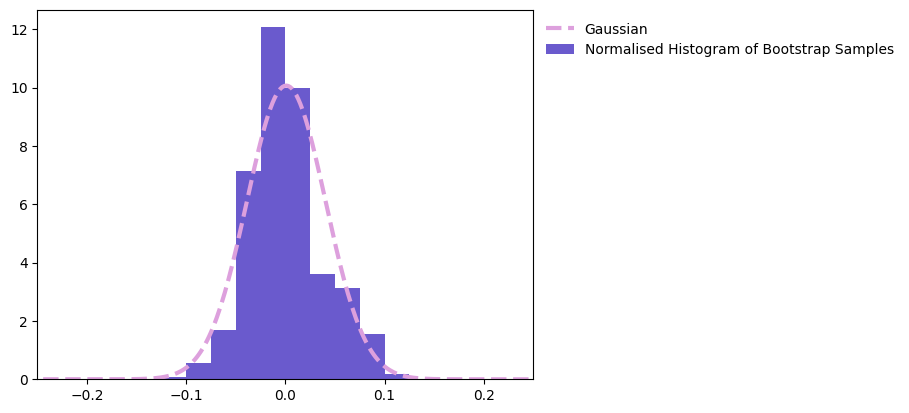

In [21]:
plt.plot(x,gauss,'--',color='plum',linewidth=3,label='Gaussian')
plt.hist(mu1,range=(-0.25,0.25),bins=20,color='slateblue',label='Normalised Histogram of Bootstrap Samples',density=True)
plt.xlim(-0.25,0.25)
plt.legend(frameon=False, bbox_to_anchor=(1,1))

# Problem 2

Text(140, 200, 'y = $2.24\\pm0.12x + 34.05\\pm21.08$')

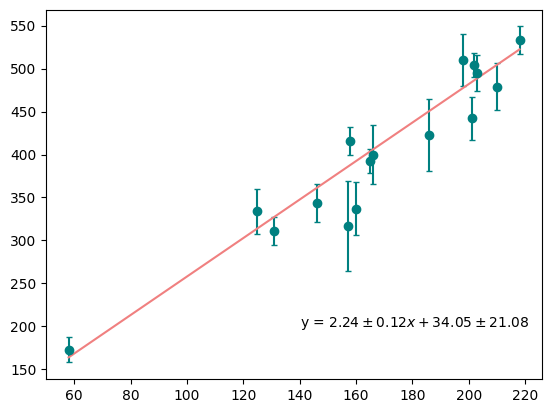

In [36]:
from scipy.optimize import curve_fit

data = np.genfromtxt('test.dat')
x=data[:,1]
y=data[:,2]
dy=data[:,3]

def line(x,m,c):
    return m*x+c

popt,pcov=curve_fit(line,x,y,sigma=dy)
errs=np.sqrt(np.diag(pcov))

plt.errorbar(x,y,dy,fmt='o',capsize=2,color='teal',label='Data')
xl=np.linspace(min(x),max(x),10)
yl=line(xl,popt[0],popt[1])
plt.plot(xl,yl,color='lightcoral',label='Best Fit Line')

sigmas=np.sqrt(np.diag(pcov))

plt.text(140,200,'y = ${}\pm{}x + {}\pm{}$'.format(np.round(popt[0],2),np.round(sigmas[0],2),np.round(popt[1],2),np.round(sigmas[1],2)))

In [37]:
print('m=',popt[0])
print('c=',popt[1])

m= 2.2399208553933314
c= 34.047723577096654


# Problem 3

In [40]:
chisq=49*np.array([0.96,0.24,3.84,2.85])
for i in chisq:
    p=1-stats.chi2(49).cdf(i)
    print('chisq=',i,';p-val=',p)

chisq= 47.04 ;p-val= 0.5529264339960218
chisq= 11.76 ;p-val= 0.9999999917009567
chisq= 188.16 ;p-val= 0.0
chisq= 139.65 ;p-val= 1.2107292945984227e-10
